# CNN in keras with pretrained word2vec weights
https://www.kaggle.com/marijakekic/cnn-in-keras-with-pretrained-word2vec-weights/notebook

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

In [3]:
columns = read_json('../orderedListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# load data

In [4]:
data = read_json('./input/mergeGenresMat.json')
print(len(data))

1631


In [5]:
train_data_IG=pd.read_csv('./stopword/train_IG.csv')
train_data_IG = train_data_IG.dropna()
train_data_IG = train_data_IG.reset_index(drop=True)
train_data_IG

,username,convert_text,genres
0,21bridgesmovie,chadwickboseman bringing bridges alma mater ho...,"['Action', 'Crime', 'Drama']"
1,21bridgesmovie,politics jk simmons captain mckenna bridges th...,"['Action', 'Crime', 'Drama']"
2,21bridgesmovie,thrilling score music bridges composed henry j...,"['Action', 'Crime', 'Drama']"
3,21bridgesmovie,experience manhunt century see bridges playing...,"['Action', 'Crime', 'Drama']"
4,21bridgesmovie,discover truth bridges starring chadwickbosema...,"['Action', 'Crime', 'Drama']"
...,...,...,...
30636,zombieland,got ta look real close one use zombieland skil...,"['Action', 'Comedy', 'Horror']"
30637,zombieland,actually lit zombieland artist dinotomic,"['Action', 'Comedy', 'Horror']"
30638,zombieland,horror comedy cast else could ask zombieland p...,"['Action', 'Comedy', 'Horror']"
30639,zombieland,said like actually said wrong zombieland playing,"['Action', 'Comedy', 'Horror']"


In [6]:
train_data_imdb=pd.read_csv('./stopword/train_imdb.csv')
train_data_imdb = train_data_imdb.dropna()
train_data_imdb = train_data_imdb.reset_index(drop=True)
train_data_imdb = train_data_imdb.rename(columns={'tconst':'username'})
train_data_imdb

,username,convert_text,genres
0,tt9413906,narrative suzan christian nun reminiscing two ...,"Crime,Drama,Mystery"
1,tt9319530,following young girl struggling get drug deali...,"Crime,Drama,Romance"
2,tt9304196,one criminals kidnap rich american ransom ca n...,"Crime,Drama,Thriller"
3,tt9283478,somewhere southern county china summer begun a...,"Comedy,Crime,Mystery"
4,tt9233940,nine nine zaw htike psychopathic disorder gett...,"Action,Crime,Drama"
...,...,...,...
1460,tt5189828,late war young mohawk woman two lovers battle ...,"Action,Drama,History"
1461,tt6334884,legendary lawman gunslinger wild bill hickok t...,Western
1462,tt6243274,tough nonsense marine vet alden rockwell lost ...,"Action,Drama,Western"
1463,tt6217608,suffering near fatal head injury young cowboy ...,"Drama,Western"


In [7]:
train_data = pd.concat([train_data_IG, train_data_imdb],ignore_index=True)
train_data

,username,convert_text,genres
0,21bridgesmovie,chadwickboseman bringing bridges alma mater ho...,"['Action', 'Crime', 'Drama']"
1,21bridgesmovie,politics jk simmons captain mckenna bridges th...,"['Action', 'Crime', 'Drama']"
2,21bridgesmovie,thrilling score music bridges composed henry j...,"['Action', 'Crime', 'Drama']"
3,21bridgesmovie,experience manhunt century see bridges playing...,"['Action', 'Crime', 'Drama']"
4,21bridgesmovie,discover truth bridges starring chadwickbosema...,"['Action', 'Crime', 'Drama']"
...,...,...,...
32101,tt5189828,late war young mohawk woman two lovers battle ...,"Action,Drama,History"
32102,tt6334884,legendary lawman gunslinger wild bill hickok t...,Western
32103,tt6243274,tough nonsense marine vet alden rockwell lost ...,"Action,Drama,Western"
32104,tt6217608,suffering near fatal head injury young cowboy ...,"Drama,Western"


In [8]:
test_data=pd.read_csv('./stopword/test_imdb.csv')
test_data

,username,convert_text
0,21bridgesmovie,embattled nypd detective thrust citywide manhu...
1,47metersdown,four teen girls diving ruined underwater city ...
2,abeautifuldaymovie,based true story reallife friendship fred roge...
3,abominablemovie,three teenagers must help yeti return family a...
4,adastramovie,astronaut roy mcbride undertakes mission acros...
...,...,...
160,wrinklestheclown,florida parents hire wrinkles clown scare misb...
161,xmenmovies,jean grey begins develop incredible powers cor...
162,yardiefilm,british crime drama film directed idris elba b...
163,yesterdaymovie,struggling musician realizes person earth reme...


In [9]:
print(train_data.shape,test_data.shape)
print(train_data.isnull().sum())
print(test_data.isnull().sum())

(32106, 3) (165, 2)
username        0
convert_text    0
genres          0
dtype: int64
username        0
convert_text    0
dtype: int64


In [10]:
ids = train_data['username'].tolist()
texts = train_data['convert_text'].tolist()
print(len(ids), len(texts))

32106 32106


In [11]:
labels = [data[id] for id in ids]
len(labels)

32106

In [12]:
val_data=train_data.sample(frac=0.2,random_state=42)
train_data= train_data.drop(val_data.index)
print(train_data.shape, val_data.shape)

(25685, 3) (6421, 3)


# Tokenize

In [13]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Using TensorFlow backend.


In [14]:
texts = train_data.convert_text

In [15]:
NUM_WORDS=30000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='—!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)

tokenizer.fit_on_texts(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32421 unique tokens.


In [16]:
sorted(word_index.items(), key=lambda d: d[1])

[('movie', 1),
 ('link', 2),
 ('theaters', 3),
 ('bio', 4),
 ('star', 5),
 ('get', 6),
 ('wars', 7),
 ('see', 8),
 ('tickets', 9),
 ('high', 10),
 ('strung', 11),
 ('film', 12),
 ('new', 13),
 ('one', 14),
 ('playing', 15),
 ('digital', 16),
 ('us', 17),
 ('repost', 18),
 ('love', 19),
 ('bluray', 20),
 ('life', 21),
 ('today', 22),
 ('nt', 23),
 ('watch', 24),
 ('story', 25),
 ('world', 26),
 ('jay', 27),
 ('bob', 28),
 ('silent', 29),
 ('day', 30),
 ('time', 31),
 ('family', 32),
 ('dance', 33),
 ('xmen', 34),
 ('art', 35),
 ('downton', 36),
 ('best', 37),
 ('check', 38),
 ('like', 39),
 ('tomorrow', 40),
 ('miss', 41),
 ('happy', 42),
 ('first', 43),
 ('friday', 44),
 ('behindthescenes', 45),
 ('days', 46),
 ('may', 47),
 ('available', 48),
 ('night', 49),
 ('premiere', 50),
 ('fans', 51),
 ('go', 52),
 ('back', 53),
 ('week', 54),
 ('dvd', 55),
 ('uglydoll', 56),
 ('cast', 57),
 ('friends', 58),
 ('tonight', 59),
 ('everywhere', 60),
 ('make', 61),
 ('th', 62),
 ('trailer', 63),
 (

In [17]:
sequences_train = tokenizer.texts_to_sequences(texts)
sequences_valid = tokenizer.texts_to_sequences(val_data.convert_text)

X_train = pad_sequences(sequences_train)
X_val = pad_sequences(sequences_valid,maxlen=X_train.shape[1])
labels = np.asarray(labels)

y_train = np.asarray(labels[train_data.index.values])
y_val = np.asarray(labels[val_data.index.values])

print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)

Shape of X train and X validation tensor: (25685, 538) (6421, 538)
Shape of label train and validation tensor: (25685, 20) (6421, 20)


# Embedding

In [18]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

outOfDict = []

word_vectors = KeyedVectors.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)
        outOfDict.append(word)

In [19]:
write_json(outOfDict, 'unstemmed_outOfDict.json')

In [20]:
# del(word_vectors)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)

## 儲存路徑

In [129]:
SAVE_NAME = 'merge_stride7-starwars'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

## Model Structure

In [130]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import Model
from keras import regularizers

sequence_length = X_train.shape[1]
filter_sizes = [3,4,5]
num_filters = 100
drop = 0.5
stride = 7

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv2D(num_filters, (filter_sizes[2], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(stride,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(stride,1))(conv_1)
maxpool_2 = MaxPooling2D((sequence_length - filter_sizes[2] + 1, 1), strides=(stride,1))(conv_2)

merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((3*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)
output = Dense(units=20, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01))(dropout)

# this creates a model that includes
model = Model(inputs, output)

In [131]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 538)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 538, 300)     9000000     input_7[0][0]                    
__________________________________________________________________________________________________
reshape_13 (Reshape)            (None, 538, 300, 1)  0           embedding_1[6][0]                
__________________________________________________________________________________________________
conv2d_19 (Conv2D)              (None, 536, 1, 100)  90100       reshape_13[0][0]                 
____________________________________________________________________________________________

In [132]:
adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])
callbacks = [EarlyStopping(monitor='val_loss')]
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks=callbacks)  # starts training

Train on 25685 samples, validate on 6421 samples
Epoch 1/100
25685/25685 [==============================] - 15s 566us/step - loss: 0.1665 - acc: 0.9798 - val_loss: 0.1208 - val_acc: 0.9796
Epoch 2/100
25685/25685 [==============================] - 14s 541us/step - loss: 0.1139 - acc: 0.9819 - val_loss: 0.1211 - val_acc: 0.9793


In [133]:
# save model weights
model.save(WEIGHTS_SAVE)

In [134]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

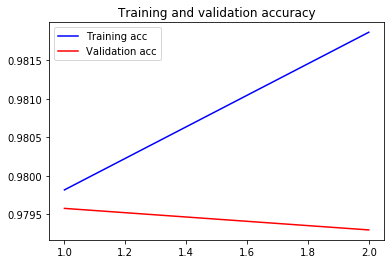

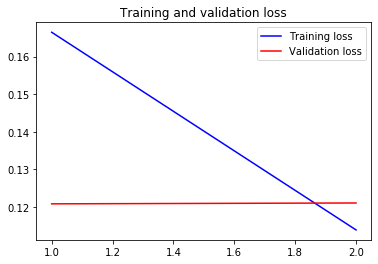

In [135]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Testing

In [136]:
sequences_test=tokenizer.texts_to_sequences(test_data.convert_text)
X_test = pad_sequences(sequences_test,maxlen=X_train.shape[1])
pred = model.predict(X_test)

In [137]:
pred.shape

(165, 20)

In [138]:
predictions = pred #pred_bool.astype(int)

results=pd.DataFrame(predictions, columns=columns)
results["username"] = test_data.username
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

## Label top n dynamic

In [139]:
true_df= pd.read_csv('./input/true_df.csv')
true_df

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,21bridgesmovie,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,47metersdown,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,abeautifuldaymovie,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,abominablemovie,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,adastramovie,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,wrinklestheclown,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
161,xmenmovies,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
162,yardiefilm,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
163,yesterdaymovie,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [140]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,21bridgesmovie,0.850440,0.049107,0.000369,0.045333,0.078394,0.861620,0.006264,0.957689,0.000568,...,0.010028,0.003613,0.008440,0.031893,0.000441,0.035226,0.007960,0.088917,0.005138,0.005523
1,47metersdown,0.166438,0.570891,0.014894,0.006681,0.056395,0.006106,0.009661,0.352925,0.025469,...,0.003891,0.045124,0.012106,0.029290,0.012233,0.003439,0.011241,0.011630,0.007079,0.007068
2,abeautifuldaymovie,0.005530,0.008308,0.001831,0.722429,0.014409,0.033251,0.021563,0.998923,0.003124,...,0.107378,0.003736,0.028804,0.028921,0.027442,0.034647,0.024534,0.009561,0.017348,0.006904
3,abominablemovie,0.216573,0.305131,0.161087,0.127240,0.526464,0.083265,0.090763,0.299253,0.094376,...,0.058259,0.124959,0.081170,0.090120,0.142398,0.069196,0.062828,0.050515,0.057747,0.049999
4,adastramovie,0.669502,0.368409,0.000520,0.004595,0.014935,0.067211,0.002432,0.761719,0.001333,...,0.001672,0.009500,0.003269,0.023199,0.000376,0.004489,0.003806,0.018574,0.001983,0.002414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,wrinklestheclown,0.012557,0.026095,0.069801,0.014188,0.884844,0.041984,0.052238,0.153849,0.064573,...,0.010343,0.519534,0.024718,0.280121,0.075603,0.007751,0.022422,0.068776,0.022704,0.020642
161,xmenmovies,0.996941,0.996574,0.000888,0.000332,0.000393,0.000112,0.000794,0.000369,0.000006,...,0.000572,0.000031,0.000016,0.000025,0.000093,0.966606,0.000018,0.002735,0.000116,0.000301
162,yardiefilm,0.053164,0.006477,0.000520,0.075163,0.117162,0.481846,0.007161,0.992969,0.001238,...,0.010879,0.007520,0.010709,0.081744,0.001963,0.006984,0.011673,0.038175,0.006095,0.004446
163,yesterdaymovie,0.018539,0.038118,0.006588,0.009237,0.337715,0.011041,0.018172,0.573105,0.052930,...,0.007256,0.093550,0.029680,0.023891,0.089219,0.001766,0.022949,0.009248,0.011879,0.009847


In [141]:
labels = read_json('../genresDic.json')

In [142]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [143]:
li = []
for i, row in true_df.iterrows():
    username = row['username']
    if username == results.loc[i,:]['username']: # username equals
        print(i, username)
        truth = labels[username]
        numTrue = sum(row[1:])
        print('count:', numTrue)
        
        s = results.loc[i,:][1:]
        top_n = s.sort_values(ascending=False)[:numTrue]
        inList = list(top_n.index)
        
        onehot = []
        for g in columns:
            onehot.append(int(g in inList))
            
        acc = countAcc(inList, truth)
        print(acc, inList, truth)
        
        appList = [username, acc, truth, inList] + onehot
        li.append(appList)
        

0 21bridgesmovie
count: 3
1.0 ['Drama', 'Crime', 'Action'] ['Action', 'Crime', 'Drama']
1 47metersdown
count: 3
0.6666666666666666 ['Adventure', 'Drama', 'Fantasy'] ['Adventure', 'Drama', 'Horror']
2 abeautifuldaymovie
count: 2
1.0 ['Drama', 'Biography'] ['Biography', 'Drama']
3 abominablemovie
count: 3
0.6666666666666666 ['Comedy', 'Adventure', 'Drama'] ['Adventure', 'Animation', 'Comedy']
4 adastramovie
count: 3
0.6666666666666666 ['Drama', 'Action', 'Adventure'] ['Adventure', 'Drama', 'Mystery']
5 adogsjourneymovie
count: 3
0.6666666666666666 ['Comedy', 'Drama', 'Animation'] ['Adventure', 'Comedy', 'Drama']
6 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Biography', 'Comedy'] ['Drama', 'Romance', 'War']
7 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
8 ahiddenlifefilm
count: 3
0.6666666666666666 ['Drama', 'Action', 'Biography'] ['Biography', 'Drama', 'War']
9 alitamovie
count: 3
1.0 ['Action', 'Adventure', 'Sci-Fi'] ['Action', 'Adventure', 'Sci-Fi']
10 ang

In [144]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,21bridgesmovie,1.000000,"[Action, Crime, Drama]","[Drama, Crime, Action]",1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,47metersdown,0.666667,"[Adventure, Drama, Horror]","[Adventure, Drama, Fantasy]",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,abeautifuldaymovie,1.000000,"[Biography, Drama]","[Drama, Biography]",0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,abominablemovie,0.666667,"[Adventure, Animation, Comedy]","[Comedy, Adventure, Drama]",0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,adastramovie,0.666667,"[Adventure, Drama, Mystery]","[Drama, Action, Adventure]",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,wrinklestheclown,0.666667,"[Comedy, Documentary, Horror]","[Comedy, Horror, Mystery]",0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
161,xmenmovies,1.000000,"[Action, Adventure, Sci-Fi]","[Action, Adventure, Sci-Fi]",1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
162,yardiefilm,1.000000,"[Crime, Drama]","[Drama, Crime]",0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
163,yesterdaymovie,0.666667,"[Comedy, Fantasy, Music]","[Drama, Comedy, Fantasy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [146]:
acc_df['acc'].mean()

0.6848484848484848

# Feature Extraction
## 測試reload model準確度

In [147]:
SAVE_NAME = 'test'

In [148]:
WEIGHTS_LOAD = './weight/merge_stride8-starwars.h5'

from keras.models import load_model

model = load_model(WEIGHTS_LOAD)

In [149]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 538)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 538, 300)     9000000     input_4[0][0]                    
__________________________________________________________________________________________________
reshape_7 (Reshape)             (None, 538, 300, 1)  0           embedding_1[0][0]                
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 536, 1, 100)  90100       reshape_7[0][0]                  
____________________________________________________________________________________________

In [150]:
sequences_test=tokenizer.texts_to_sequences(test_data.convert_text)
X_test = pad_sequences(sequences_test,maxlen=X_train.shape[1])
pred = model.predict(X_test)
pred.shape

(165, 20)

In [151]:
predictions = pred

results=pd.DataFrame(predictions, columns=columns)
results["username"] = test_data.username
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

In [152]:
labels = read_json('../genresDic.json')

In [153]:
li = []
for i, row in true_df.iterrows():
    username = row['username']
    if username == results.loc[i,:]['username']: # username equals
        print(i, username)
        truth = labels[username]
        numTrue = sum(row[1:])
        print('count:', numTrue)
        
        s = results.loc[i,:][1:]
        top_n = s.sort_values(ascending=False)[:numTrue]
        inList = list(top_n.index)
        
        onehot = []
        for g in columns:
            onehot.append(int(g in inList))
            
        acc = countAcc(inList, truth)
        print(acc, inList, truth)
        
        appList = [username, acc, truth, inList] + onehot
        li.append(appList)

0 21bridgesmovie
count: 3
1.0 ['Drama', 'Action', 'Crime'] ['Action', 'Crime', 'Drama']
1 47metersdown
count: 3
0.6666666666666666 ['Adventure', 'Drama', 'Action'] ['Adventure', 'Drama', 'Horror']
2 abeautifuldaymovie
count: 2
1.0 ['Drama', 'Biography'] ['Biography', 'Drama']
3 abominablemovie
count: 3
0.6666666666666666 ['Comedy', 'Drama', 'Adventure'] ['Adventure', 'Animation', 'Comedy']
4 adastramovie
count: 3
0.6666666666666666 ['Action', 'Drama', 'Adventure'] ['Adventure', 'Drama', 'Mystery']
5 adogsjourneymovie
count: 3
0.6666666666666666 ['Comedy', 'Drama', 'Animation'] ['Adventure', 'Comedy', 'Drama']
6 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Horror', 'Comedy'] ['Drama', 'Romance', 'War']
7 aftermovie
count: 2
0.5 ['Drama', 'Action'] ['Drama', 'Romance']
8 ahiddenlifefilm
count: 3
0.6666666666666666 ['Drama', 'Action', 'Biography'] ['Biography', 'Drama', 'War']
9 alitamovie
count: 3
1.0 ['Action', 'Adventure', 'Sci-Fi'] ['Action', 'Adventure', 'Sci-Fi']
10 angelha

In [154]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df['acc'].mean()

0.6919191919191918

## 萃取97部電影imdb的feature

In [155]:
X_test.shape

(165, 538)

In [157]:
extract_layer = Model(inputs=model.input,
                      outputs=model.get_layer('flatten_4').output)
#以这个model的预测值作为输出
extract_output = extract_layer.predict(X_test)
print(extract_output.shape)

(165, 300)


In [158]:
idx = test_data.username.tolist()
print(len(idx), idx)

165 ['21bridgesmovie', '47metersdown', 'abeautifuldaymovie', 'abominablemovie', 'adastramovie', 'adogsjourneymovie', 'aftermathmovie', 'aftermovie', 'ahiddenlifefilm', 'alitamovie', 'angelhasfallen', 'angrybirdsmovie', 'annabellemovie', 'annamovie', 'apollo11movie', 'arcticdogsmovie', 'arcticmovie', 'artofracingmovie', 'avengers', 'beachbummovie', 'bernadettefilm', 'blackandbluemovie', 'blackchristmas', 'blindedbythelightmovie', 'bombshellmovie', 'booksmart', 'breakthroughmovie', 'brianbanksmovie', 'brightburnmovie', 'brittanyrunsmov', 'captainmarvelofficial', 'captivestatemovie', 'catsmovie', 'charliesangels', 'childsplaymovie', 'clarathefilm', 'coldpursuitmovie', 'countdown', 'currentwarmovie', 'darkwatersmovie', 'detectivepikachumovie', 'disneyaladdin', 'disneyfrozen', 'disneymaleficent', 'doctorsleepmovie', 'dolemiteismyname', 'dontletgomovie', 'doramovie', 'downtonabbey_official', 'dumbo', 'escaperoom', 'everybodyknowsmovie', 'fastandfuriousmovie', 'fightingwmyfam', 'fivefeetapart

In [159]:
res=pd.DataFrame(extract_output, index = idx)
res

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
21bridgesmovie,4.625625,0.270240,0.843757,0.361738,0.385804,0.386609,1.417814,3.703098,1.964221,0.340831,...,0.518959,1.518856,1.617028,0.689357,0.253527,0.424694,3.344936,3.522084,0.689225,2.659301
47metersdown,1.227327,1.386205,1.245207,0.483765,1.854537,1.861350,1.422121,1.313766,1.073333,1.669586,...,2.369604,0.415461,2.303477,1.855965,0.722303,0.954404,1.338140,0.958282,1.601425,1.273016
abeautifuldaymovie,0.302373,0.038617,0.328554,0.393081,0.214754,0.233469,0.234261,0.317635,2.241514,0.386934,...,1.382313,0.505444,0.411402,1.813654,0.109178,0.619214,4.462339,0.545749,0.698804,2.974110
abominablemovie,0.186162,0.000000,0.089363,0.246190,0.235176,0.256702,0.428070,0.513695,0.565004,0.521737,...,0.586406,0.315048,0.432583,1.190027,0.128935,0.620930,0.421282,0.109546,0.694254,0.206418
adastramovie,3.830110,1.397172,1.287266,0.298948,1.933444,2.106336,2.286842,2.996084,1.740809,1.958116,...,1.833267,1.069029,3.520368,0.546656,1.459306,0.568826,2.526160,2.906972,1.745568,2.181656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrinklestheclown,0.853294,0.896881,0.000000,1.337605,1.505762,1.014642,0.112749,0.271832,0.412343,0.873156,...,1.331714,1.854079,0.000000,1.670097,0.958906,0.974099,0.554800,0.130257,0.475131,0.115792
xmenmovies,2.842772,0.806930,5.102901,0.388758,1.401573,1.073662,4.430752,5.804434,0.536433,0.629329,...,0.906498,0.570307,9.188423,1.268965,0.614569,2.790452,1.126672,3.803742,7.926337,0.756108
yardiefilm,2.580427,0.371021,0.258102,1.061416,0.314597,0.228967,0.332296,2.102141,2.003907,0.501374,...,1.032518,2.002433,0.319524,1.297553,0.279873,1.396268,3.653067,2.020441,0.691687,2.927577
yesterdaymovie,1.098065,1.916392,0.428723,0.717684,1.611092,1.348285,0.459656,0.504291,0.889729,2.496572,...,3.017361,1.263357,0.501066,1.724245,1.742528,0.652188,1.596182,0.407870,0.948900,0.851927


In [160]:
res.to_csv("./output/TextFeatureVec.csv", header=False)